# 

 - duplicate this notebook first.  
   https://medium.com/the-research-nest/applied-machine-learning-part-1-40578469a934
 
 - take only most relevant features for multiple linear regression
    
       
 - add more algorithms such as kernel, neural network, and k nearest neighbor
   
     
 - compare the performances
    
    
 - write a report on regression algorithms you learned ( 5-10 pages)

In [4]:
#install pandas
!pip install pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\lukel\OneDrive\Desktop\Data Analytics and Development\kc_house_data.csv")

In [7]:
# check the first 5 lines
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# check how many rowsxcol
data.shape

(21613, 21)

In [9]:
# chech data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# check missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
data = data.drop(['date', 'zipcode'], axis = 1)

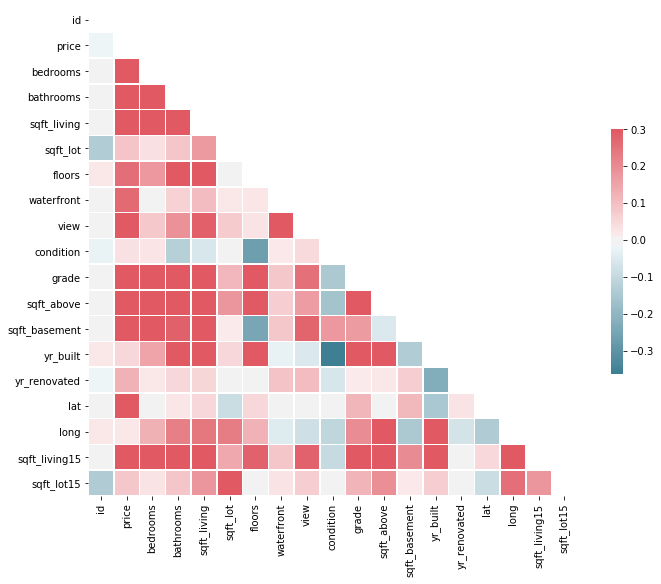

In [13]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#install sklearn
!pip install sklearn

In [15]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = data[features]
y = data.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics 
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()

Mean Absolute Error: 125002.07442242983
Mean Squared Error: 43690646677.922485
Root Mean Squared Error: 209023.07690282067


,Actual,Predicted
17384,297000.0,3.872015e+05
722,1578000.0,1.502715e+06
2680,562100.0,5.274534e+05
18754,631500.0,5.779358e+05
14554,780000.0,9.993390e+05


Text(0, 0.5, 'Predicted prices')

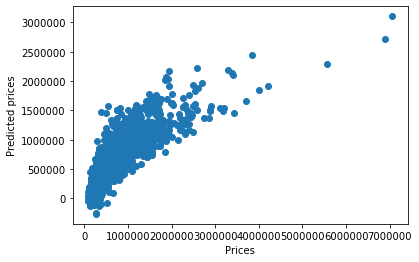

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [19]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score


#Implementation of LassoCV
lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Lasso): ", np.sqrt(-cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
#Implementation of ElasticNet
elastic = ElasticNet(alpha=0.001)
print("Root Mean Squared Error (ElasticNet): ", np.sqrt(-cross_val_score(elastic, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
#Implementation of RidgeCV
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285549242121498.2, tolerance: 204936331764.47177
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283590900829332.6, tolerance: 204936331764.47177
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283393109487249.94, tolerance: 204936331764.

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361639111611559.94, tolerance: 260004851035.958
  positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285549242121498.2, tolerance: 204936331764.47177
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283590900829332.6, tolerance: 204936331764.47177
  tol, rng, ra

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279892865425108.53, tolerance: 201651437066.31332
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279702255860448.97, tolerance: 201651437066.31332
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279683163980434.12, tolerance: 20165143706

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291273220892742.3, tolerance: 210782093959.34027
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291267632586159.8, tolerance: 210782093959.34027
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291298073637034.9, tolerance: 210782093959.3

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274836930864649.8, tolerance: 200327563048.60263
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274848625279513.78, tolerance: 200327563048.60263
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274859843675580.75, tolerance: 200327563048

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292455030845207.5, tolerance: 212094211009.69373
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292257823557085.7, tolerance: 212094211009.69373
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292238206528775.06, tolerance: 212094211009.

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290332890392079.8, tolerance: 209149043386.0015
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290134260167180.4, tolerance: 209149043386.0015
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290114380587383.25, tolerance: 209149043386.00

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292981782586890.5, tolerance: 209387158695.20868
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292781310407117.0, tolerance: 209387158695.20868
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292761188348314.9, tolerance: 209387158695.2

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289715657790233.9, tolerance: 207492266924.71667
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289513825678511.3, tolerance: 207492266924.71667
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289493684410181.1, tolerance: 207492266924.7

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293319362701061.75, tolerance: 210730183104.08142
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293114919386968.25, tolerance: 210730183104.08142
  tol, rng, random, positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293094501453896.3, tolerance: 210730183104

C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361801503001468.94, tolerance: 260675069806.91736
  positive)


Root Mean Squared Error (Lasso):  203418.22857312454


C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398498086557827.06, tolerance: 260004851035.958
  positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394263044506721.94, tolerance: 257092287072.88525
  positive)
C:\Users\lukel\AppData\Local\Continuum\anaconda3\envs\DataAnalyticsAndDevelopmentHW1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407055016206543.44, tolerance: 266184745178.01212
  positive)
C:\Users\lukel\App

Root Mean Squared Error (ElasticNet):  203442.40673916912
Root Mean Squared Error (Ridge):  203594.53990046313


Results from the above cell says that:
Root Mean Squared Error (Lasso):  203418.22857312454
Root Mean Squared Error (ElasticNet):  203442.40673916912
Root Mean Squared Error (Ridge):  203594.53990046313

## split data into training vs testing datasets

In [20]:
# two options for spliting
# (1) your own code (2) use sklearn lib.

# This is option (1)
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# call the function 
train_set, test_set = split_train_test(data, 0.2)

print(len(train_set))
print(len(test_set))

17291
4322


In [21]:
# install sklearn the first time or if haven't already
#sklearn is already installed
!pip install sklearn

In [22]:
# import the function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [23]:
print(len(train_set))
print(len(test_set))

17290
4323


## stratified sampling (prefer) vs ramdom sampling
 - create new col named as income_cat

In [24]:
# use several bins for income: here bin # = 5
data["price_cat"] = pd.cut(data["price"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

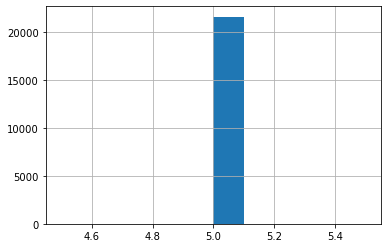

In [25]:
# check distribution
data["price_cat"].hist()

In [26]:
# split the data again using stratified sampling in order to keep the data samples proportional

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["price_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [27]:
# check the distribution of test data in each bin (group)
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: price_cat, dtype: float64

In [28]:
# get rid of the category col for data consistence
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

In [29]:
# take traing set only for ML later
data = strat_train_set.copy()

## Vizualization

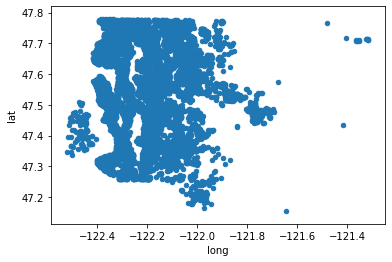

In [30]:
# simple scater
data.plot(kind="scatter", x="long", y="lat")
# Washington

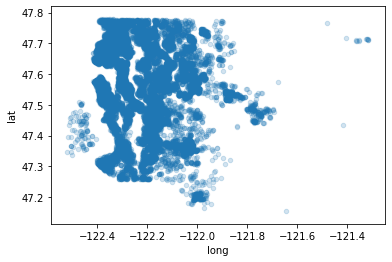

In [31]:
# transparency: alpha in the (0, 1)
data.plot(kind="scatter", x="long", y="lat", alpha=0.2) # transparent: alpha

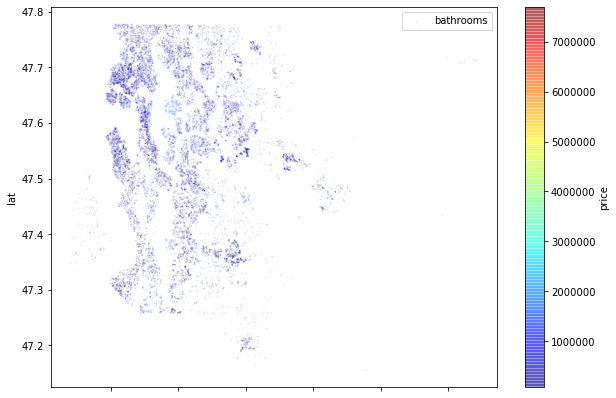

In [32]:
# Next : heatmap-like
# The radius of each circle represents the district’s population (option s), 
# The color represents the price (option c). 
# We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

data.plot(kind="scatter", x="long", y="lat", alpha=0.4,
s=data["bathrooms"]/100, label="bathrooms", figsize=(10,7),
c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [33]:
!pip install xgboost

Root Mean Squared Error (Xgboost):  123218.42198419607


Text(0.5, 1.0, 'xgboost')

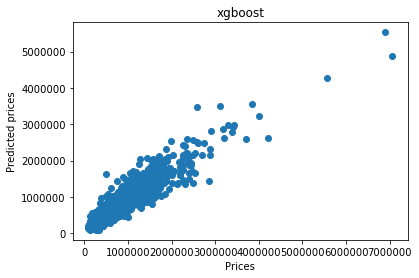

In [34]:
#Implementation of xgboost
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200,                                                                 reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Root Mean Squared Error (Xgboost): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("xgboost")

# STEP 1. Preparing the Data for Machine Learning Algorithms

### 1.1 Data Cleaning:   missing values
 **fill out by median**

In [81]:
# X for training, drop the dependant variable (y = median_house_value)
data = strat_train_set.drop("price", axis=1)
data = strat_train_set.drop("id", axis=1)

#  the y is considered as label ( y = median_house_value)
data_labels = strat_train_set["price"].copy()


In [82]:
# You can use sklearn tool
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [83]:
# Since the median can only be computed on numerical attributes, 
# you need to create a copy of the data without the text attribute

# numerical data only

In [84]:
imputer.fit(data)

# now you will have the median values for all 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [85]:
# use .statistics_ to check them
imputer.statistics_

array([ 4.50000e+05,  3.00000e+00,  2.25000e+00,  1.92000e+03,
        7.64200e+03,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.56000e+03,  0.00000e+00,  1.97400e+03,
        0.00000e+00,  4.75716e+01, -1.22230e+02,  1.84000e+03,
        7.62250e+03])

In [86]:
# verification use datafram function
data.median()

data.median().values



array([ 4.50000e+05,  3.00000e+00,  2.25000e+00,  1.92000e+03,
        7.64200e+03,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.56000e+03,  0.00000e+00,  1.97400e+03,
        0.00000e+00,  4.75716e+01, -1.22230e+02,  1.84000e+03,
        7.62250e+03])

In [87]:
#  use this “trained” imputer to transform the training set by replacing missing values with the learned medians:
X = imputer.transform(data)

# The result is a plain NumPy array containing the transformed features. 

In [88]:
# Put it back into a pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=data.columns,index=data.index)
housing_tr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
10711,335000.0,3.0,2.00,1340.0,1951.0,0.0,0.0,3.0,6.0,670.0,670.0,1915.0,0.0,47.5763,-122.309,1520.0,2248.0
2868,763101.0,3.0,1.75,1990.0,5560.0,0.0,0.0,4.0,7.0,1100.0,890.0,1939.0,0.0,47.6640,-122.287,1460.0,3706.0
532,970000.0,4.0,3.25,4740.0,76230.0,0.0,0.0,3.0,10.0,4740.0,0.0,1987.0,0.0,47.5931,-122.071,3340.0,49206.0
18912,1920000.0,4.0,2.50,3070.0,34412.0,0.0,3.0,4.0,9.0,2070.0,1000.0,1950.0,0.0,47.6400,-122.240,3780.0,27940.0
21379,391000.0,3.0,2.50,1800.0,1120.0,0.0,0.0,3.0,8.0,1800.0,0.0,2011.0,0.0,47.5436,-122.369,1800.0,2380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,175000.0,3.0,1.00,1070.0,6164.0,0.0,0.0,3.0,7.0,1070.0,0.0,1967.0,0.0,47.3377,-122.291,1320.0,7920.0
1048,515000.0,3.0,2.25,1920.0,11500.0,0.0,0.0,3.0,8.0,1920.0,0.0,1972.0,2000.0,47.5498,-122.188,2260.0,8866.0
382,389000.0,4.0,2.25,2130.0,5337.0,0.0,0.0,3.0,7.0,2130.0,0.0,2001.0,0.0,47.7237,-121.959,2300.0,6930.0
1280,445000.0,3.0,2.50,2470.0,4565.0,0.0,0.0,3.0,7.0,2470.0,0.0,2005.0,0.0,47.5140,-122.189,2470.0,5064.0


### 1.2 Handling Text and Categorical Attributes

In [89]:
data.shape # THE LABEL IS IN THIS DATA

(17290, 17)

## 1.3  Feature Selection:

# Next Step. Select and Train Model
 - regression: for continuous values

## something is not total consistent with book code:
   -  we should do the split by now
   
   - the reason is that we need to keep the test/train with same scale and features
  
   - otherwise, we should do the same for the testing data (feature selection and scaling )

### for now, forget about the earlier spliting

## 2.0 Spliting data into training and testing (80/20)

In [90]:
X_prepared = data
X_prepared.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
10711,335000.0,3,2.00,1340,1951,0,0,3,6,670,670,1915,0,47.5763,-122.309,1520,2248
2868,763101.0,3,1.75,1990,5560,0,0,4,7,1100,890,1939,0,47.6640,-122.287,1460,3706
532,970000.0,4,3.25,4740,76230,0,0,3,10,4740,0,1987,0,47.5931,-122.071,3340,49206
18912,1920000.0,4,2.50,3070,34412,0,3,4,9,2070,1000,1950,0,47.6400,-122.240,3780,27940
21379,391000.0,3,2.50,1800,1120,0,0,3,8,1800,0,2011,0,47.5436,-122.369,1800,2380


In [91]:
# take some data from the scaled data for test now
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, data_labels, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13832, 17) (3458, 17) (13832,) (3458,)


## 2.1. For different models:  Training and Evaluating on the Training Set 

# K-NN Model

In [108]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
k_neighbors_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

#Train the model
k_neighbors_reg.fit(X_train, y_train)

# (b) test model
some_data = X_test
some_labels = y_test


#  compare:
print("Predictions:", k_neighbors_reg.predict(some_data))
print("Real Price:", list(some_labels))

### (c) Evaluation with Mean-squared-error

from sklearn.metrics import mean_squared_error

housing_predictions = k_neighbors_reg.predict(X_test)

knn_mse = mean_squared_error(y_test, housing_predictions)
knn_rmse = np.sqrt(knn_mse)

print("Random Standard Error:", knn_rmse)

Predictions: [ 998000.  345000.  740000. ... 1085000.  299999.  535000.]
Real Price: [999000.0, 346150.0, 740000.0, 325000.0, 355000.0, 430000.0, 320000.0, 369950.0, 402500.0, 765000.0, 700000.0, 790000.0, 380000.0, 492500.0, 675000.0, 978000.0, 689000.0, 950000.0, 450000.0, 580000.0, 165000.0, 685000.0, 305000.0, 342000.0, 550000.0, 725000.0, 320000.0, 1230000.0, 290000.0, 374950.0, 315000.0, 1007500.0, 229000.0, 570000.0, 557500.0, 723000.0, 290000.0, 170000.0, 499950.0, 360000.0, 189000.0, 183000.0, 284950.0, 209950.0, 1247000.0, 260000.0, 625000.0, 362000.0, 430000.0, 200000.0, 1100000.0, 264000.0, 220000.0, 616000.0, 750000.0, 84000.0, 160000.0, 747000.0, 207000.0, 667000.0, 410000.0, 178500.0, 297000.0, 495000.0, 970000.0, 895000.0, 1410000.0, 582000.0, 495000.0, 1839900.0, 330000.0, 260000.0, 115000.0, 535000.0, 459000.0, 312000.0, 319950.0, 245000.0, 1695000.0, 220000.0, 327500.0, 265000.0, 340000.0, 633634.0, 1017100.0, 1130000.0, 460000.0, 321000.0, 480000.0, 312000.0, 365000

Predictions: [ 998000.  345000.  740000. ... 1085000.  299999.  535000.]
Real Price: [999000.0, 346150.0, 740000.0, 325000.0, 355000.0, 430000.0, 320000.0, 369950.0, 402500.0, 765000.0, 700000.0, 790000.0, 380000.0, 492500.0, 675000.0, 978000.0, 689000.0, 950000.0, 450000.0, 580000.0, 165000.0, 685000.0, 305000.0, 342000.0, 550000.0, 725000.0, 320000.0, 1230000.0, 290000.0, 374950.0, 315000.0, 1007500.0, 229000.0, 570000.0, 557500.0, 723000.0, 290000.0, 170000.0, 499950.0, 360000.0, 189000.0, 183000.0, 284950.0, 209950.0, 1247000.0, 260000.0, 625000.0, 362000.0, 430000.0, 200000.0, 1100000.0, 264000.0, 220000.0, 616000.0, 750000.0, 84000.0, 160000.0, 747000.0, 207000.0, 667000.0, 410000.0, 178500.0, 297000.0, 495000.0, 970000.0, 895000.0, 1410000.0, 582000.0, 495000.0, 1839900.0, 330000.0, 260000.0, 115000.0, 535000.0, 459000.0, 312000.0, 319950.0, 245000.0, 1695000.0, 220000.0, 327500.0, 265000.0, 340000.0, 633634.0, 1017100.0, 1130000.0, 460000.0, 321000.0, 480000.0, 312000.0, 365000

Text(0.5, 1.0, 'K-NN')

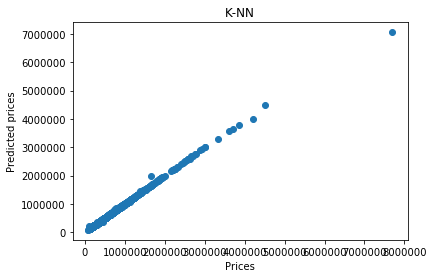

In [110]:
#  compare:
print("Predictions:", k_neighbors_reg.predict(some_data))
print("Real Price:", list(some_labels))

### (c) Evaluation with Mean-squared-error

from sklearn.metrics import mean_squared_error

housing_predictions = k_neighbors_reg.predict(X_test)

knn_mse = mean_squared_error(y_test, housing_predictions)
knn_rmse = np.sqrt(knn_mse)


y_pred = k_neighbors_reg.predict(X_test)
print("Root Mean Squared Error (KNN): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("K-NN")